In [14]:
#обучающий набор - реальные инструменты, тестовый набор - синтезатор

In [1]:
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#features = ['_22050_.csv']

features = ['_22050_.csv','_22050_db1_cA.csv', '_22050_db1_cD.csv', '_22050_db2_cA.csv', '_22050_db2_cD.csv', \
               '_22050_db3_cA.csv', '_22050_db3_cD.csv','_22050_db4_cA.csv', '_22050_db4_cD.csv', \
               '_22050_haar_cA.csv', '_22050_haar_cD.csv', \
               '_22050_db8_cA.csv', '_22050_db8_cD.csv','_22050_db20_cA.csv', '_22050_db20_cD.csv', \
               '_22050_dmey_cA.csv', '_22050_dmey_cD.csv']

classes = ['piano', 'guitar', 'violin', 'trumpet']
n_mfcc = 15 #далее в rca преобразуется в 20
n_rca = n_mfcc

def filename():
    types=['train', 'test']
    rootdir = os.getcwd()
    train_names = dict()
    test_names = dict()
    for type_ in types:
        dirpath = os.path.join(rootdir, type_)
        for feature in features:
            temp = list()
            for new_root, dirs, files in os.walk(dirpath):
                for file in files:
                    if Path(file).suffix == '.csv':
                        if feature in file:
                            temp.append(os.path.join(new_root, file))
            temp.sort()
            if type_ == 'train':
                train_names.update({feature:temp})
            if type_ == 'test':
                test_names.update({feature:temp})
    return train_names, test_names

def create_dataset(f_train_names, f_test_names):
    x_lim = 21  #(22050/512)/2 = 21 отсчета на 0.5 секунды звучания
    y_lim = n_mfcc
    def rav(arr): # разбивка отсчетов по секундам
        arr = np.array(arr)
        #pca1 = PCA(n_components=n_rca)
        #projected = pca1.fit_transform(arr) #МЕТОД ГЛАВНЫХ КОМПОНЕНТ
        projected = arr
        sound = np.zeros(shape = (1, x_lim * n_rca))
        for i in range(projected.shape[0] // x_lim):
            if (i + 1) * x_lim < projected.shape[0]:
                temp = projected[i * x_lim : (i + 1) * x_lim, :]
                temp = temp.ravel()
                sound = np.vstack((sound, temp))
        sound = sound[1:, :]
        res = pd.DataFrame(sound)
        return res
    
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    for train_name, test_name, label in zip(f_train_names, f_test_names, classes):
        temp_df = pd.read_csv(train_name)
        temp_df = rav(temp_df[[str(i) for i in range(y_lim)]])
        temp_df.columns = [str(i) for i in range(x_lim * n_rca)]
        temp_df['class'] = label
        df_train = pd.concat([df_train, temp_df], ignore_index = True)
        df_train = df_train.sample(frac=1).reset_index(drop=True)
        
        temp_df = pd.read_csv(test_name)
        temp_df = rav(temp_df[[str(i) for i in range(n_rca)]])
        temp_df.columns = [str(i) for i in range(x_lim * n_rca)]
        temp_df['class'] = label
        df_test = pd.concat([df_test, temp_df], ignore_index = True)
        df_test = df_test.sample(frac=1).reset_index(drop=True)
        
        X_train = df_train[[str(i) for i in range(x_lim * n_rca)]]
        y_train = df_train['class']
        X_test = df_test[[str(i) for i in range(x_lim * n_rca)]]
        y_test = df_test['class']
    return X_train, y_train, X_test, y_test

Анализ датасета _22050_.csv


<Figure size 1080x504 with 0 Axes>

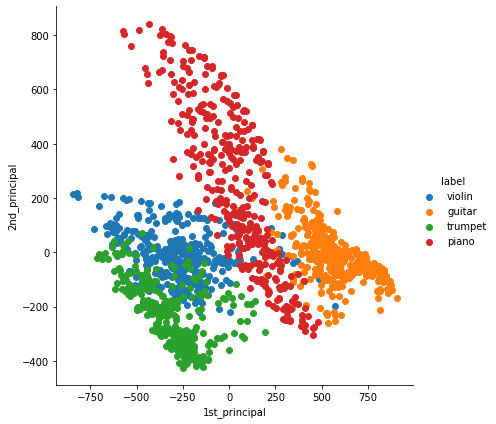

<Figure size 1080x504 with 0 Axes>

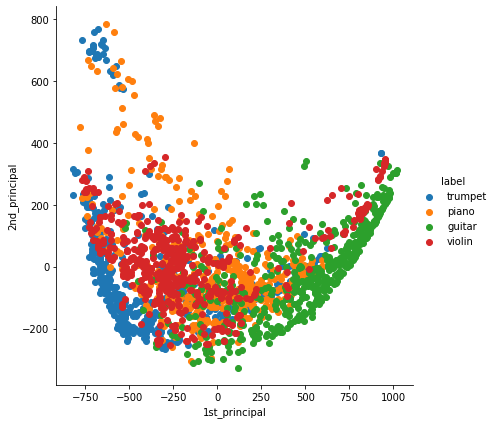

Анализ датасета _22050_db1_cA.csv


<Figure size 1080x504 with 0 Axes>

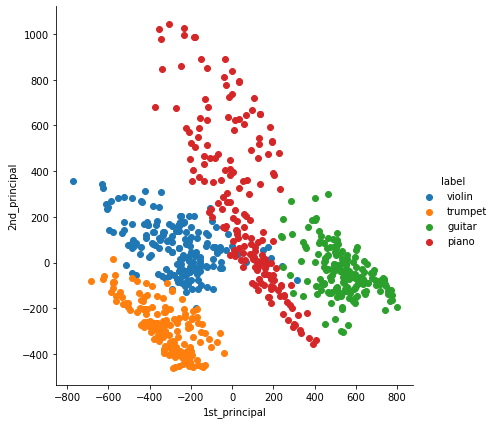

<Figure size 1080x504 with 0 Axes>

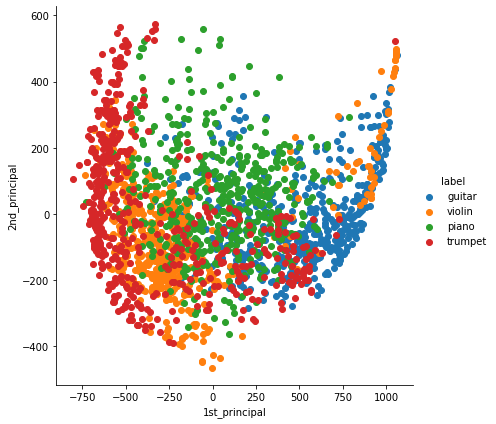

Анализ датасета _22050_db1_cD.csv


<Figure size 1080x504 with 0 Axes>

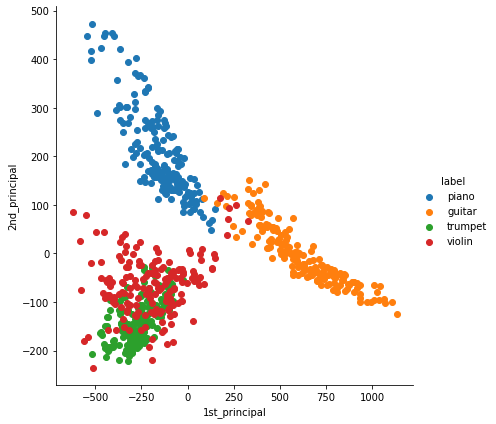

<Figure size 1080x504 with 0 Axes>

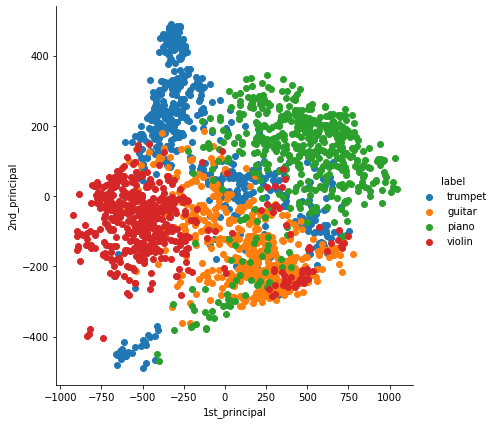

Анализ датасета _22050_db2_cA.csv


<Figure size 1080x504 with 0 Axes>

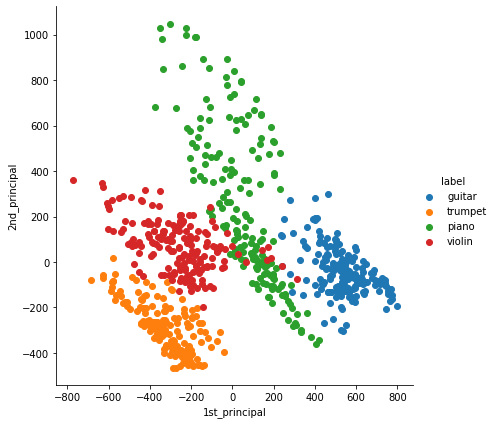

<Figure size 1080x504 with 0 Axes>

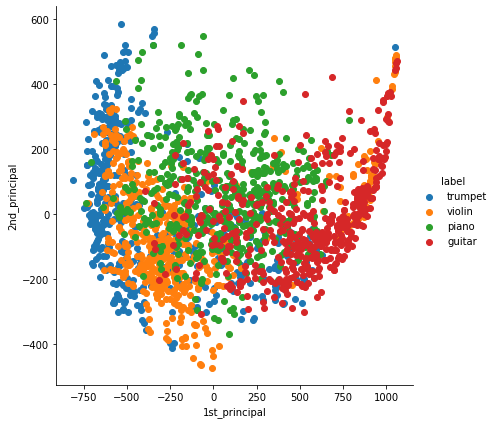

Анализ датасета _22050_db2_cD.csv


<Figure size 1080x504 with 0 Axes>

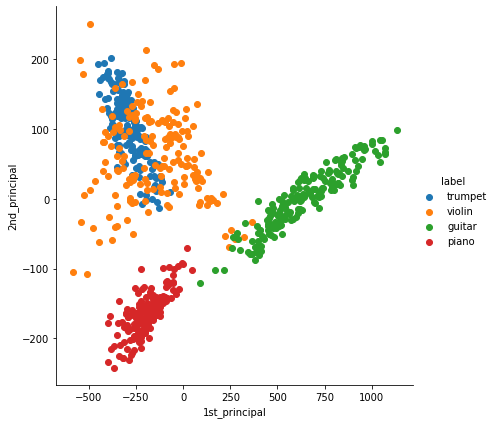

<Figure size 1080x504 with 0 Axes>

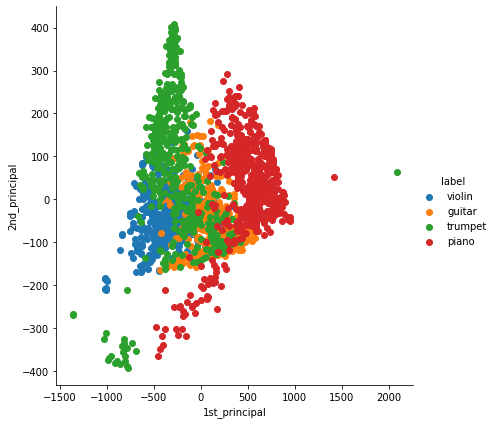

Анализ датасета _22050_db3_cA.csv


<Figure size 1080x504 with 0 Axes>

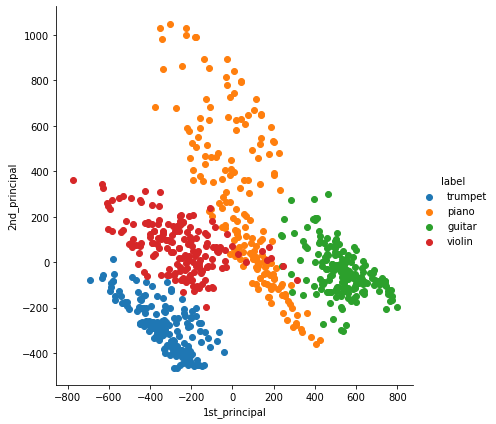

<Figure size 1080x504 with 0 Axes>

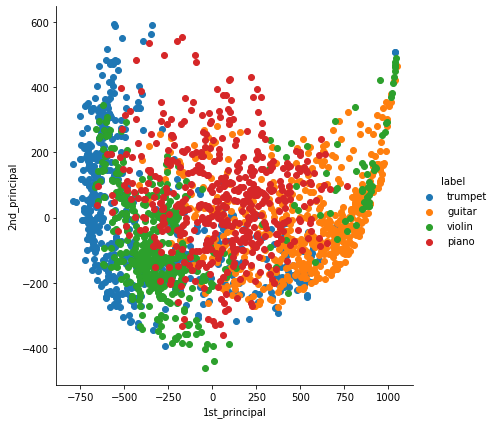

Анализ датасета _22050_db3_cD.csv


<Figure size 1080x504 with 0 Axes>

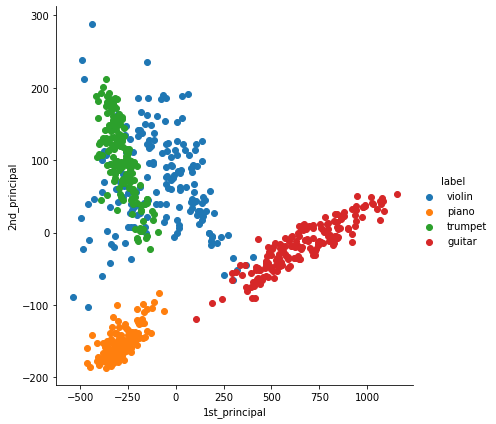

<Figure size 1080x504 with 0 Axes>

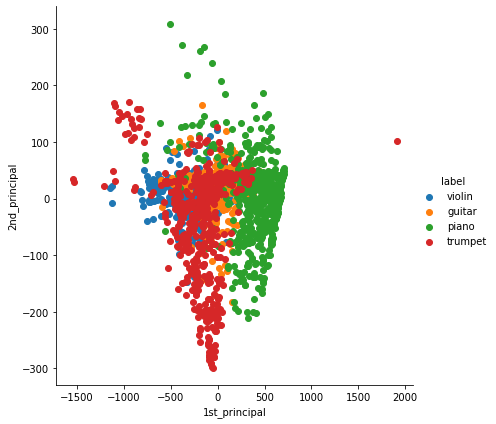

Анализ датасета _22050_db4_cA.csv


<Figure size 1080x504 with 0 Axes>

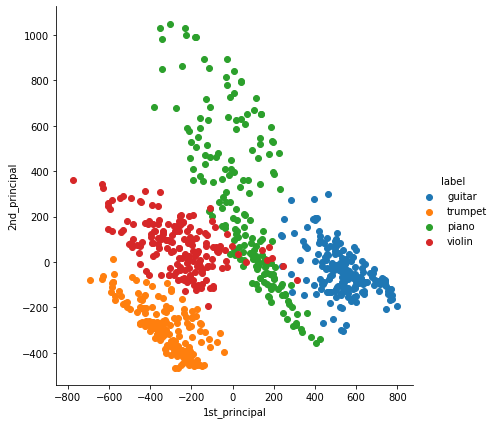

<Figure size 1080x504 with 0 Axes>

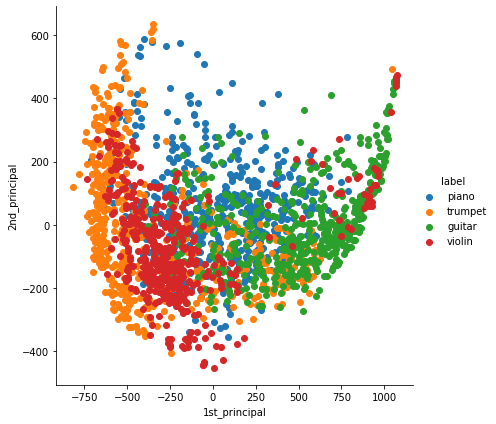

Анализ датасета _22050_db4_cD.csv


<Figure size 1080x504 with 0 Axes>

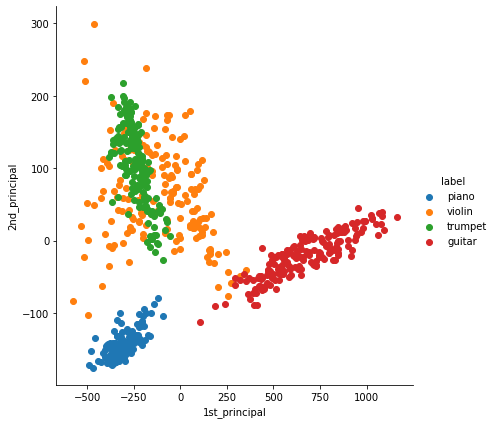

<Figure size 1080x504 with 0 Axes>

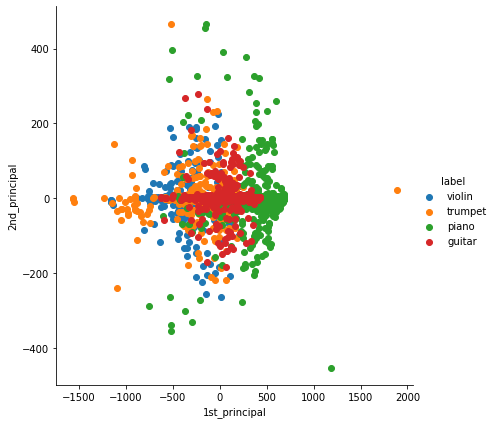

Анализ датасета _22050_haar_cA.csv


<Figure size 1080x504 with 0 Axes>

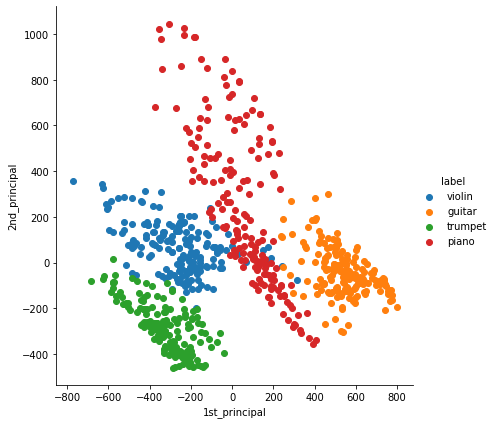

<Figure size 1080x504 with 0 Axes>

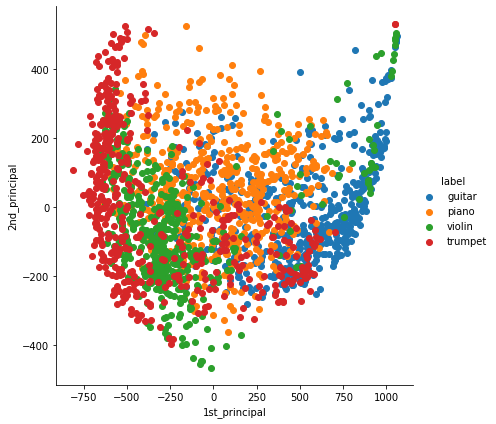

Анализ датасета _22050_haar_cD.csv


<Figure size 1080x504 with 0 Axes>

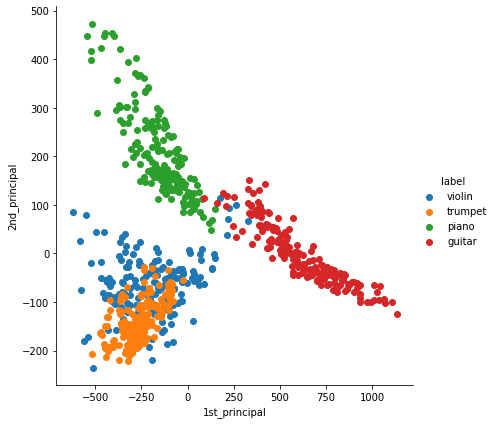

<Figure size 1080x504 with 0 Axes>

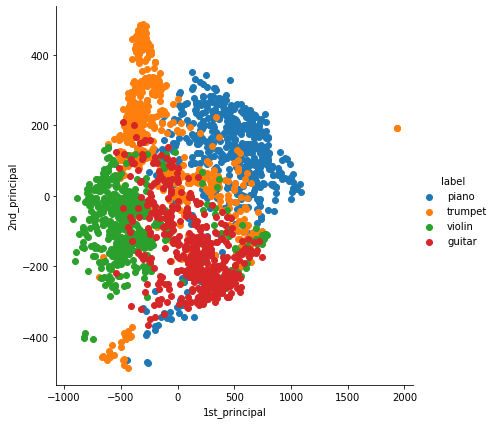

Анализ датасета _22050_db8_cA.csv


<Figure size 1080x504 with 0 Axes>

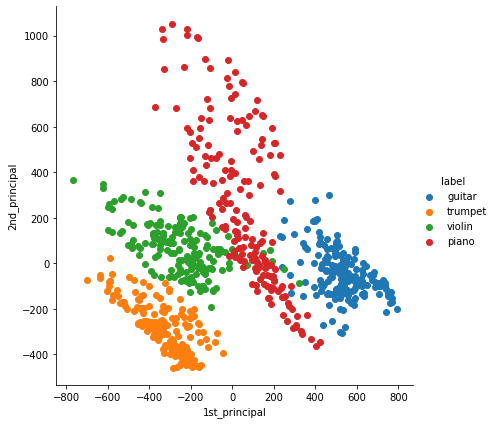

<Figure size 1080x504 with 0 Axes>

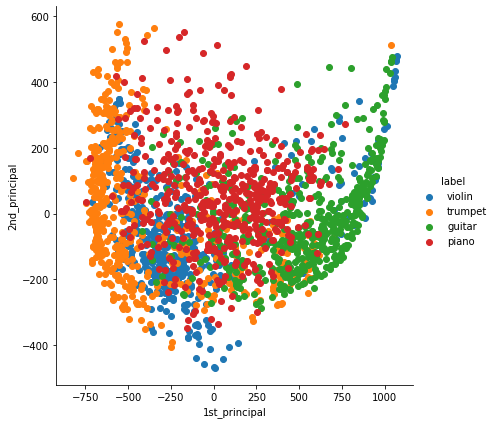

Анализ датасета _22050_db8_cD.csv


<Figure size 1080x504 with 0 Axes>

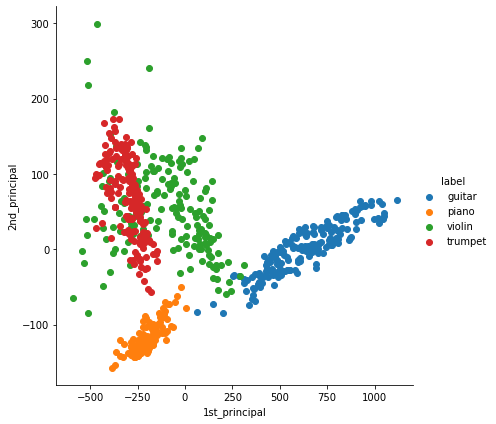

<Figure size 1080x504 with 0 Axes>

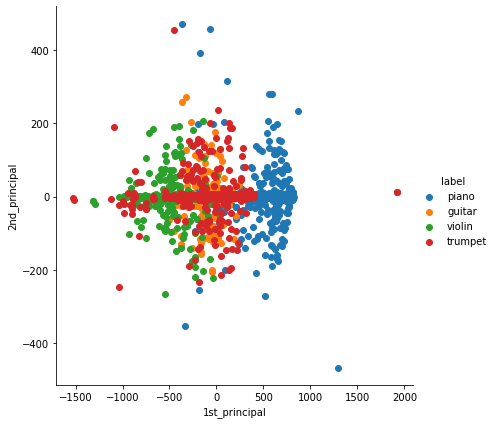

Анализ датасета _22050_db20_cA.csv


<Figure size 1080x504 with 0 Axes>

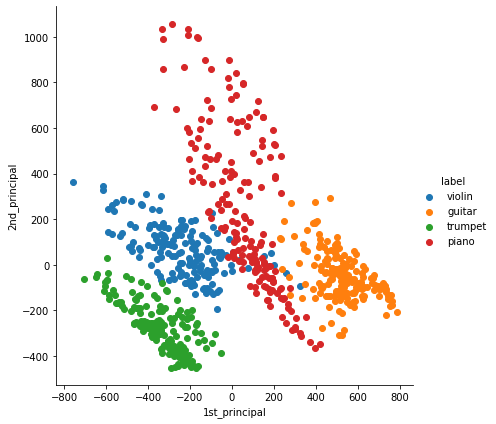

<Figure size 1080x504 with 0 Axes>

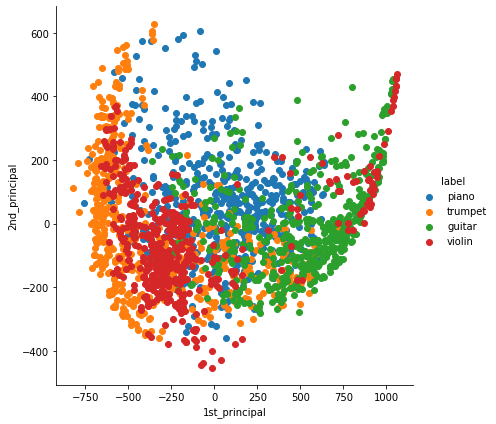

Анализ датасета _22050_db20_cD.csv


<Figure size 1080x504 with 0 Axes>

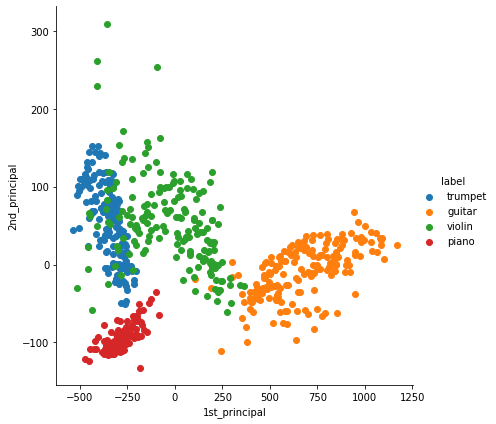

<Figure size 1080x504 with 0 Axes>

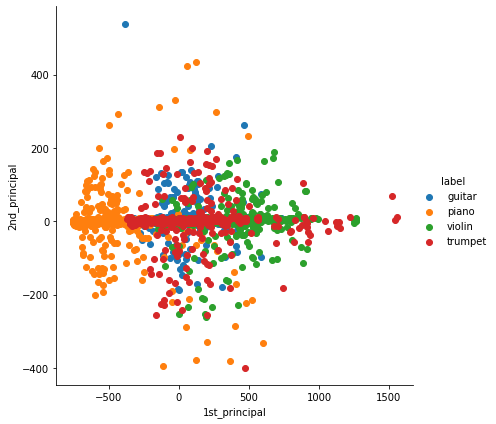

Анализ датасета _22050_dmey_cA.csv


<Figure size 1080x504 with 0 Axes>

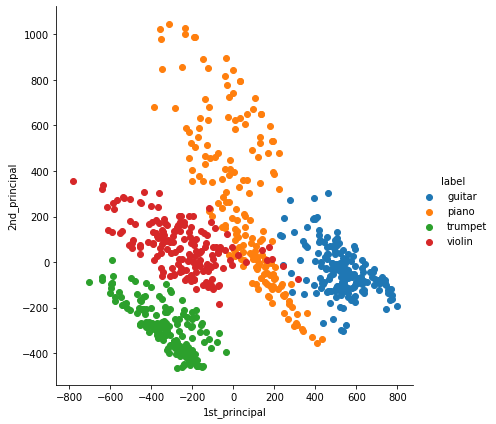

<Figure size 1080x504 with 0 Axes>

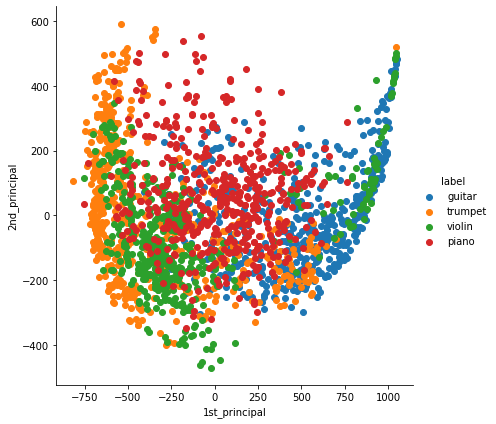

Анализ датасета _22050_dmey_cD.csv


<Figure size 1080x504 with 0 Axes>

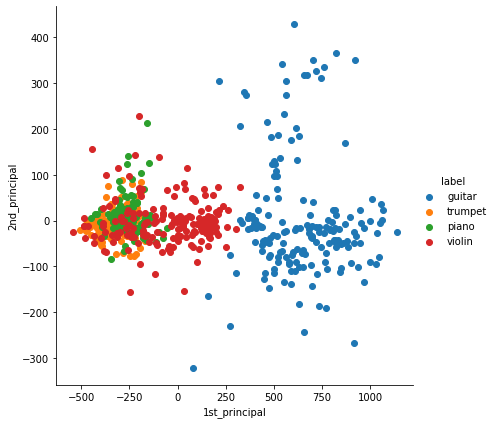

<Figure size 1080x504 with 0 Axes>

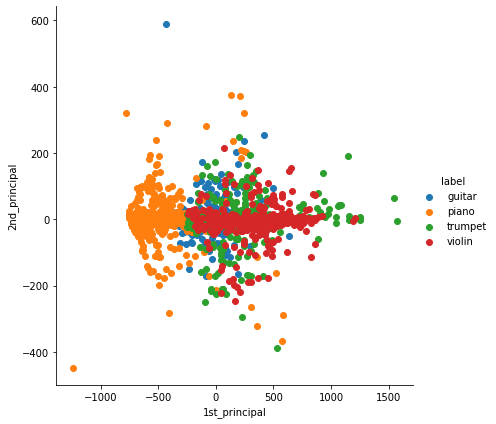

In [17]:
#визуализация датасетов RCA
train_names, test_names = filename()
#print(train_names, test_names)
for feature in features:
    f_train_names = train_names[feature]
    f_test_names = test_names[feature]
    print(f'Анализ датасета {feature}')
    #print(f_train_names)
    #print(f_test_names)
    X_train, y_train, X_test, y_test = create_dataset(f_train_names, f_test_names)
    data = np.array(X_train)[0:2000, :]
    labels = np.array(y_train)[0:2000]
    pca2 = PCA(n_components=2)
    projected = pca2.fit_transform(data)
    data_df = pd.DataFrame(projected, columns=["1st_principal", "2nd_principal"])
    data_df['label'] = labels
    plt.figure(figsize=(15, 7))
    sn.FacetGrid(data_df, hue="label", height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
    plt.show()

    data = np.array(X_test)[0:2000, :]
    labels = y_test[0:2000]
    pca2 = PCA(n_components=2)
    projected = pca2.fit_transform(data)
    data_df = pd.DataFrame(projected, columns=["1st_principal", "2nd_principal"])
    data_df['label'] = labels
    plt.figure(figsize=(15, 7))
    sn.FacetGrid(data_df, hue="label", height=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
    plt.show()


Анализ датасета _22050_.csv


<Figure size 1080x504 with 0 Axes>

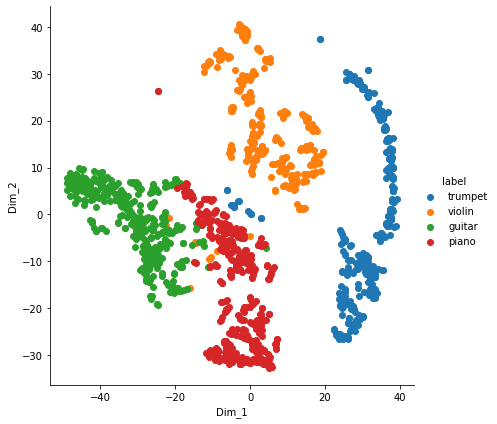

<Figure size 1080x504 with 0 Axes>

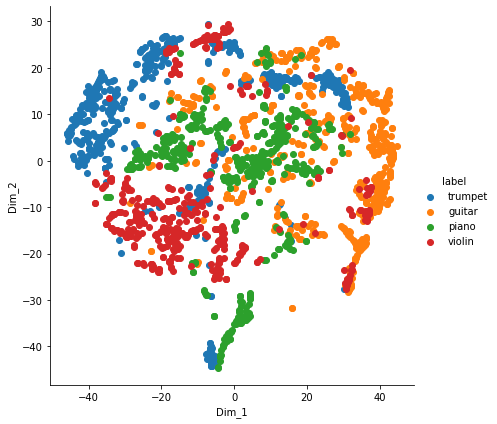

Анализ датасета _22050_db1_cA.csv


<Figure size 1080x504 with 0 Axes>

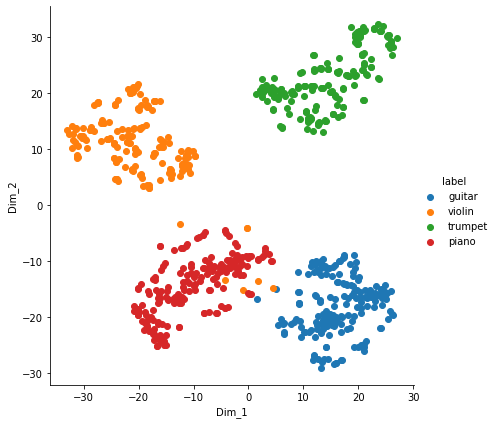

<Figure size 1080x504 with 0 Axes>

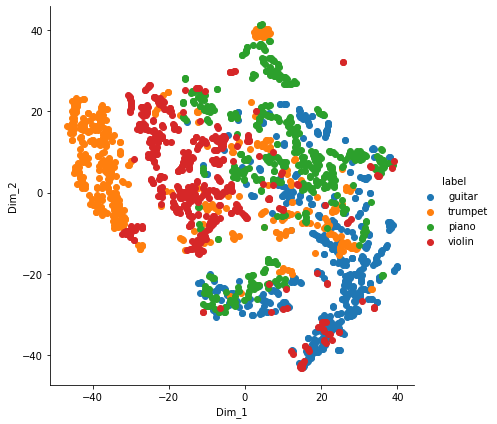

Анализ датасета _22050_db1_cD.csv


<Figure size 1080x504 with 0 Axes>

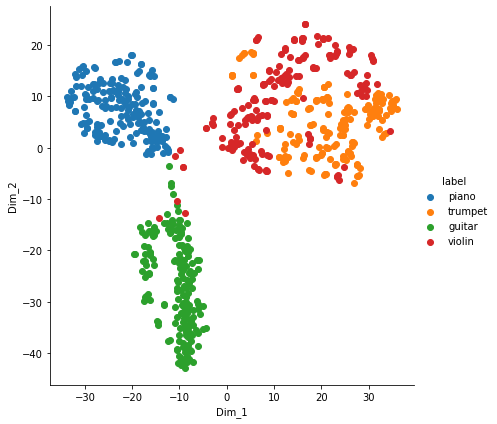

<Figure size 1080x504 with 0 Axes>

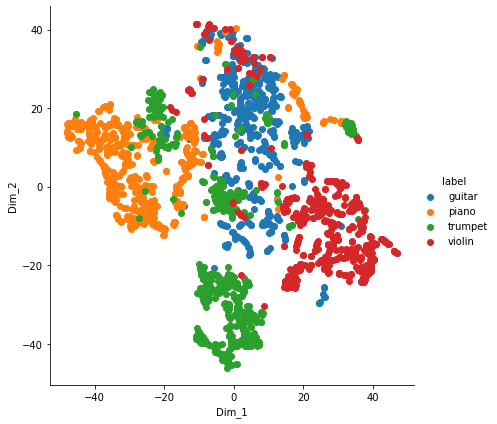

Анализ датасета _22050_db2_cA.csv


<Figure size 1080x504 with 0 Axes>

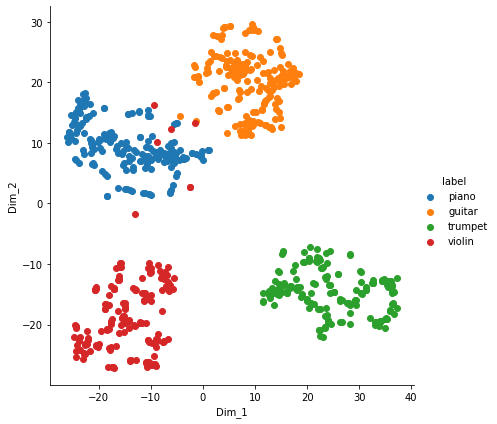

<Figure size 1080x504 with 0 Axes>

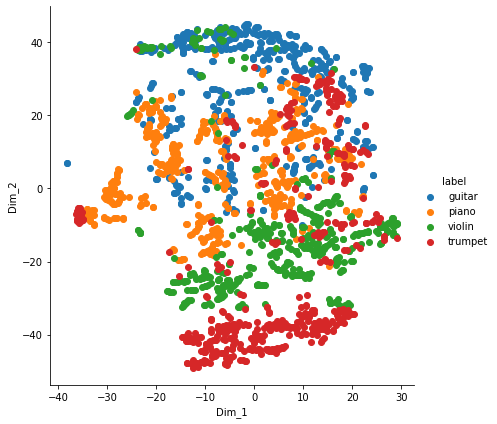

Анализ датасета _22050_db2_cD.csv


<Figure size 1080x504 with 0 Axes>

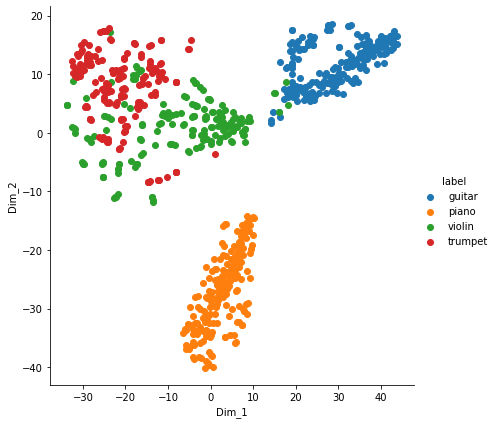

<Figure size 1080x504 with 0 Axes>

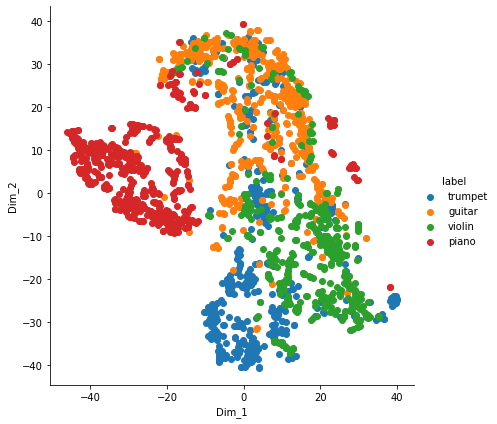

Анализ датасета _22050_db3_cA.csv


<Figure size 1080x504 with 0 Axes>

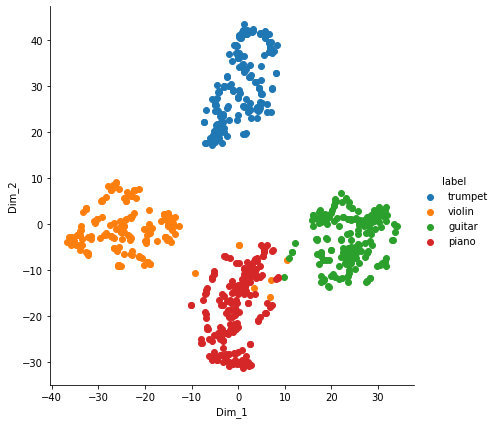

<Figure size 1080x504 with 0 Axes>

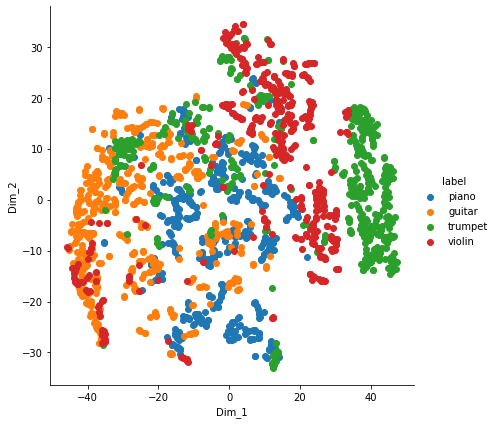

Анализ датасета _22050_db3_cD.csv


<Figure size 1080x504 with 0 Axes>

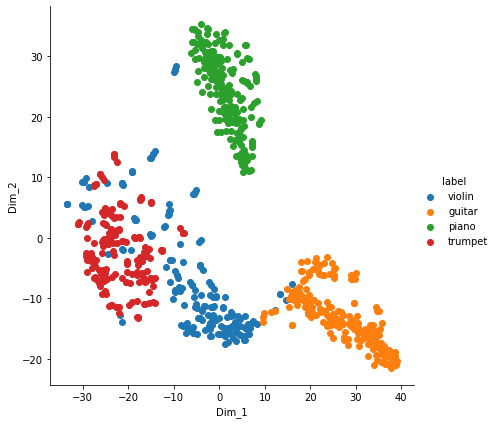

<Figure size 1080x504 with 0 Axes>

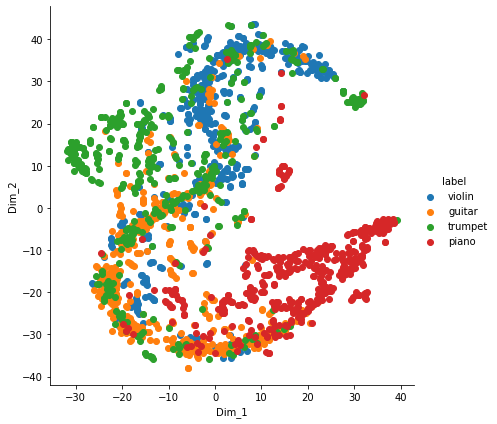

Анализ датасета _22050_db4_cA.csv


<Figure size 1080x504 with 0 Axes>

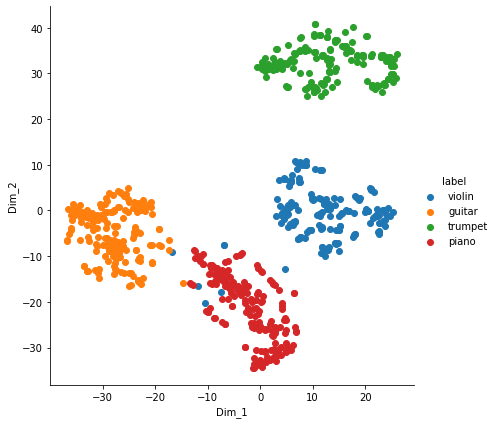

<Figure size 1080x504 with 0 Axes>

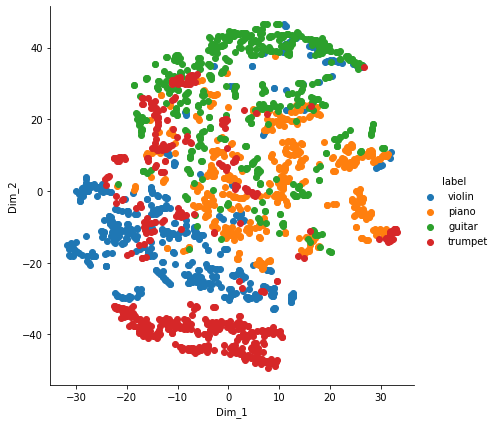

Анализ датасета _22050_db4_cD.csv


<Figure size 1080x504 with 0 Axes>

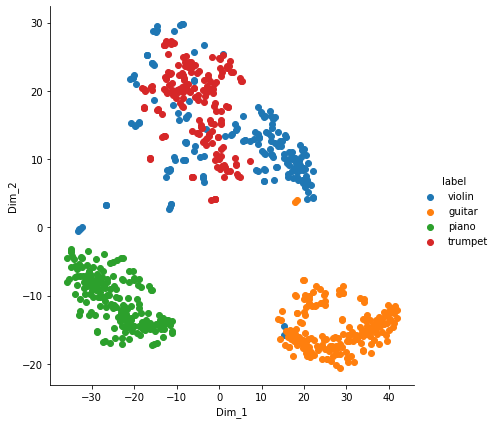

<Figure size 1080x504 with 0 Axes>

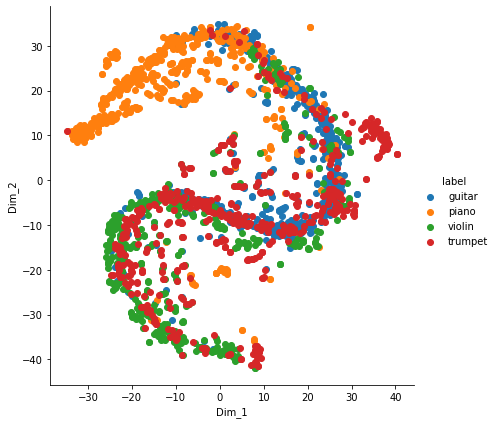

Анализ датасета _22050_haar_cA.csv


<Figure size 1080x504 with 0 Axes>

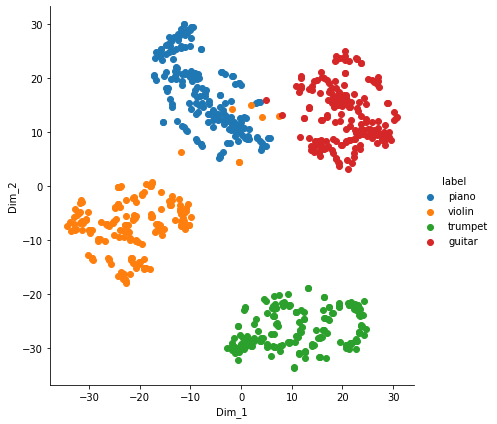

<Figure size 1080x504 with 0 Axes>

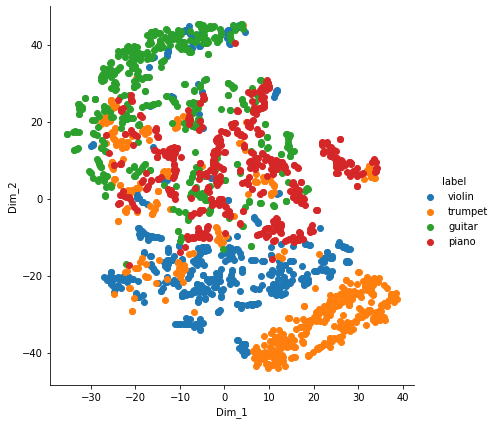

Анализ датасета _22050_haar_cD.csv


<Figure size 1080x504 with 0 Axes>

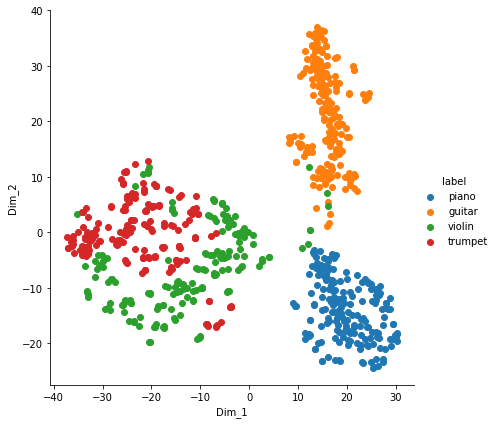

<Figure size 1080x504 with 0 Axes>

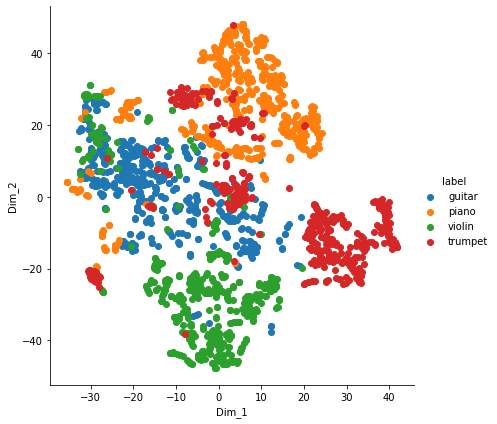

Анализ датасета _22050_db8_cA.csv


<Figure size 1080x504 with 0 Axes>

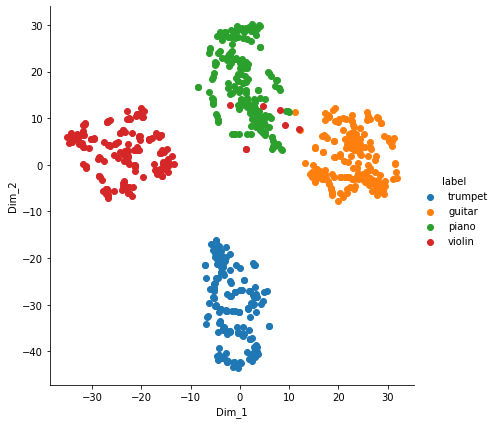

<Figure size 1080x504 with 0 Axes>

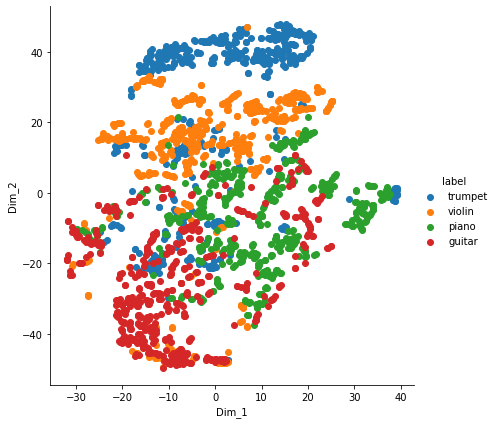

Анализ датасета _22050_db8_cD.csv


<Figure size 1080x504 with 0 Axes>

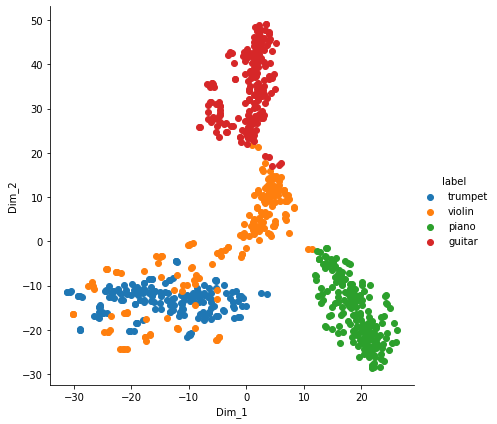

<Figure size 1080x504 with 0 Axes>

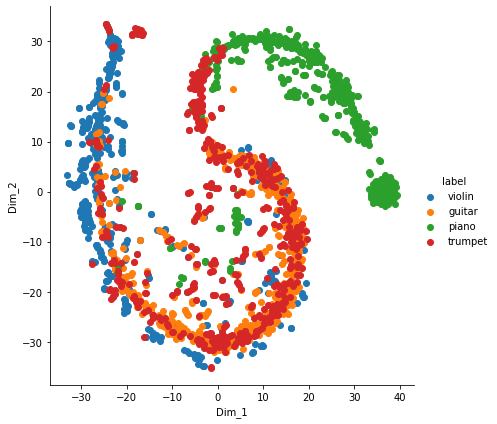

Анализ датасета _22050_db20_cA.csv


<Figure size 1080x504 with 0 Axes>

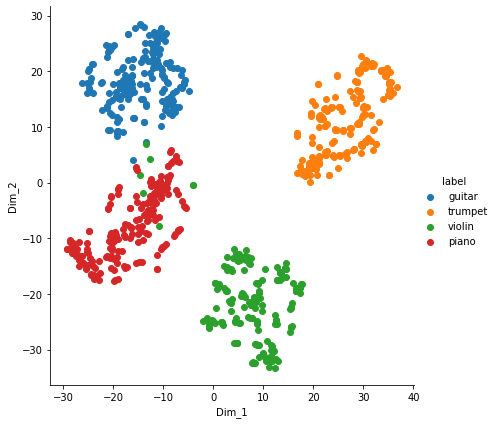

<Figure size 1080x504 with 0 Axes>

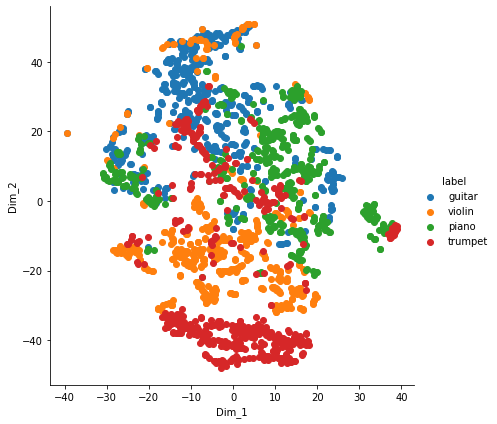

Анализ датасета _22050_db20_cD.csv


<Figure size 1080x504 with 0 Axes>

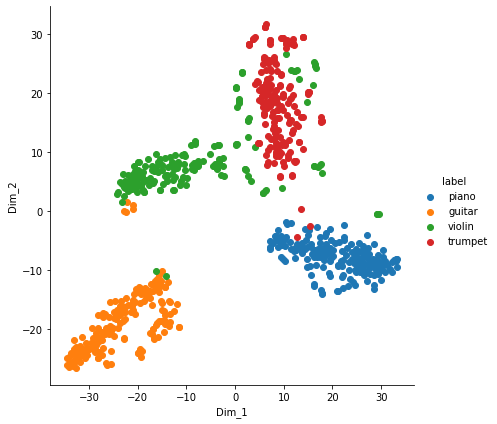

<Figure size 1080x504 with 0 Axes>

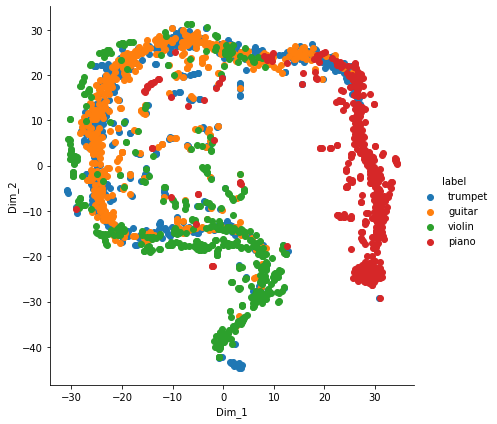

Анализ датасета _22050_dmey_cA.csv


<Figure size 1080x504 with 0 Axes>

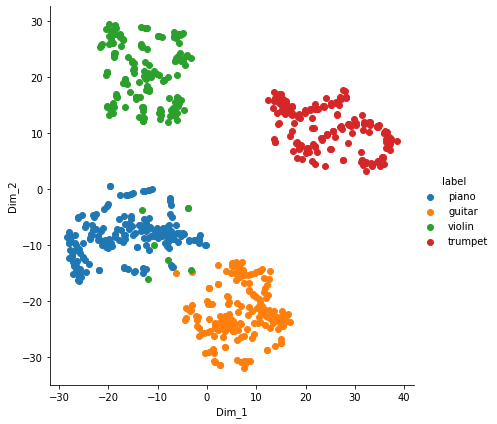

<Figure size 1080x504 with 0 Axes>

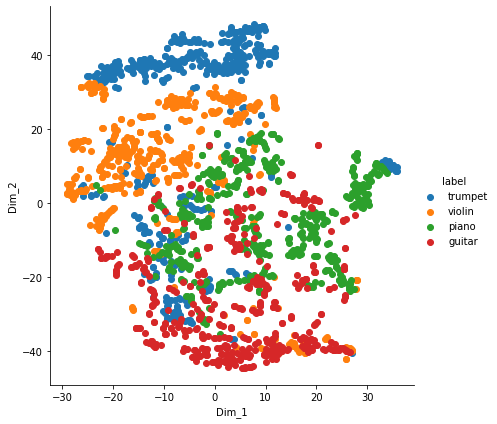

Анализ датасета _22050_dmey_cD.csv


<Figure size 1080x504 with 0 Axes>

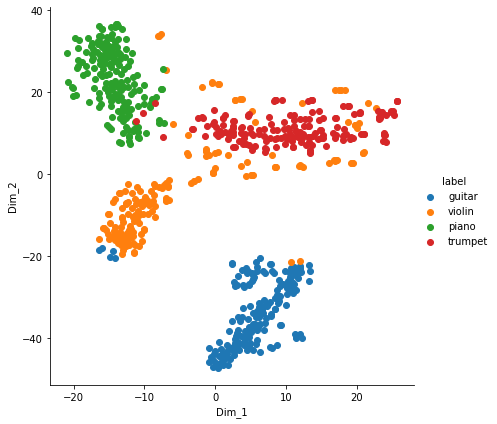

<Figure size 1080x504 with 0 Axes>

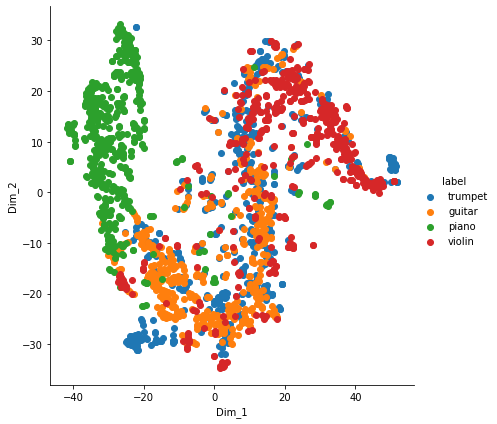

In [18]:
#визуализация датасетов t-sne
train_names, test_names = filename()
#print(train_names, test_names)
for feature in features:
    f_train_names = train_names[feature]
    f_test_names = test_names[feature]
    print(f'Анализ датасета {feature}')
    #print(f_train_names)
    #print(f_test_names)
    
    X_train, y_train, X_test, y_test = create_dataset(f_train_names, f_test_names)
    
    data = np.array(X_train)[0:2000, :]
    labels = np.array(y_train)[0:2000]    
    model = TSNE(n_components=2, random_state=42, perplexity = 30, learning_rate = 10, n_iter = 1000)
    # configuring the parameteres
    # the number of components = 2
    # default perplexity = 30
    # default learning rate = 200
    # default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(data)
    tsne_data = np.vstack((tsne_data.T, labels)).T
    plt.figure(figsize=(15, 7))
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()

    data = np.array(X_test)[0:2000, :]
    labels = np.array(y_test)[0:2000]  
    model = TSNE(n_components=2, random_state=42, perplexity = 30, learning_rate = 10, n_iter = 1000)
    # configuring the parameteres
    # the number of components = 2
    # default perplexity = 30
    # default learning rate = 200
    # default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(data)
    tsne_data = np.vstack((tsne_data.T, labels)).T
    plt.figure(figsize=(15, 7))
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()


In [7]:
import warnings    # отключим предупреждения
warnings.filterwarnings('ignore')

def measure(y_test, y_test_predict, classes):
    #conf matrix
    conf_matrix = pd.DataFrame(np.zeros((4, 4)), index = classes, columns = classes)
    for y_p, y in zip(y_test_predict, y_test):
        conf_matrix.loc[y_p, y] += 1
        
    #accuracy
    accuracy_list=list()
    for cl in classes:
        accuracy = 0.
        count = 0
        for y_p, y in zip(y_test_predict, y_test):
            if y == cl:
                count+=1
                if y_p == y:
                    accuracy += 1.
        accuracy /= count
        accuracy_list.append(accuracy)
    
    #precision
    temp = list()
    for genre in classes:
        if np.sum(conf_matrix.loc[genre, :]) != 0.:
            f= conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[genre, :]) 
            temp.append(f) 
        else:
            temp.append(0.)
    precision_list = temp
    #precision = np.mean(temp)
    
    #recall
    temp = list()
    for genre in classes:
        if np.sum(conf_matrix.loc[:, genre]) != 0.:
            f= conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[:, genre]) 
            temp.append(f)
        else:
            temp.append(0.)
    recall_list = temp
    #recall = np.mean(temp)
    
    #f_measure
    #f_measure = 2.0 * precision * recall / (precision + recall)
    f_list=list()
    for p, r in zip(precision_list, recall_list):
        if p+r != 0.:
            f_list.append(2.0*p*r/(p+r))
        else:
            f_list.append(0.)
    
    df = pd.DataFrame([accuracy_list, precision_list, recall_list, f_list], columns = classes, index = ['accuracy', 'precision', 'recall', 'f_measure'])
    conf_matrix = pd.DataFrame(conf_matrix, columns = classes, index = classes)
    return conf_matrix, round(df,2)

In [8]:
# RandomForestClassifier
n_estimators = 100
max_depth = 10
criterions = ['entropy', 'gini']
n_splits=5

if __name__ == '__main__':
    train_names, test_names = filename()
    #print(train_names, test_names)
    for feature in features:
        for criterion in criterions:
            f_train_names = train_names[feature]
            f_test_names = test_names[feature]
            print(f'Анализ датасета {feature} {criterion}')
            #print(f_train_names)
            #print(f_test_names)

            X, y, X_test, y_test = create_dataset(f_train_names, f_test_names)
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

            rfc = RandomForestClassifier(random_state=42, criterion = criterion, max_depth = max_depth, n_estimators = n_estimators)
            kf = KFold(n_splits=n_splits, shuffle=True) #генератор разбиений
            score = cross_val_score(rfc, X_train, y_train, cv=kf)
            print(f'Обучающий набор score cross_val = {round(np.mean(score),2)}')
            
            rfc.fit(X_train, y_train)
            
            y_val_predict = rfc.predict(X_val)
            conf_matrix, df = measure(y_val, y_val_predict, classes)
            score = rfc.score(X_val, y_val)
            print(f'Тестовый набор score = {round(np.mean(score),2)}')
            print(df)
            print(conf_matrix)

            y_test_predict = rfc.predict(X_test)
            conf_matrix, df = measure(y_test, y_test_predict, classes)
            score = rfc.score(X_test, y_test)
            print(f'Проверочный набор score = {round(np.mean(score),2)}')
            print(df)
            print(conf_matrix)


Анализ датасета _22050_.csv entropy
Обучающий набор score cross_val = 0.99
Тестовый набор score = 0.97
           piano  guitar  violin  trumpet
accuracy    0.95    1.00    0.94      1.0
precision   0.98    0.90    1.00      1.0
recall      0.95    1.00    0.94      1.0
f_measure   0.96    0.95    0.97      1.0
         piano  guitar  violin  trumpet
piano     78.0     0.0     2.0      0.0
guitar     4.0    57.0     2.0      0.0
violin     0.0     0.0    64.0      0.0
trumpet    0.0     0.0     0.0     80.0
Проверочный набор score = 0.34
           piano  guitar  violin  trumpet
accuracy    0.48    0.86     0.0      0.0
precision   0.27    0.39     0.0      0.0
recall      0.48    0.86     0.0      0.0
f_measure   0.35    0.53     0.0      0.0
          piano  guitar  violin  trumpet
piano    1017.0   292.0  1023.0   1434.0
guitar   1108.0  1836.0  1105.0    694.0
violin      3.0     0.0     0.0      0.0
trumpet     0.0     0.0     0.0      0.0
Анализ датасета _22050_.csv gini
Обучающи

Обучающий набор score cross_val = 0.97
Тестовый набор score = 0.92
           piano  guitar  violin  trumpet
accuracy     1.0    1.00    0.76     0.97
precision    1.0    0.86    0.97     0.86
recall       1.0    1.00    0.76     0.97
f_measure    1.0    0.93    0.85     0.91
         piano  guitar  violin  trumpet
piano     31.0     0.0     0.0      0.0
guitar     0.0    31.0     5.0      0.0
violin     0.0     0.0    34.0      1.0
trumpet    0.0     0.0     6.0     36.0
Проверочный набор score = 0.29
           piano  guitar  violin  trumpet
accuracy     0.0    0.99    0.13     0.03
precision    0.0    0.27    0.61     1.00
recall       0.0    0.99    0.13     0.03
f_measure    0.0    0.43    0.21     0.07
          piano  guitar  violin  trumpet
piano       0.0     2.0   115.0     35.0
guitar   1045.0  1057.0   814.0    929.0
violin     19.0     5.0   135.0     64.0
trumpet     0.0     0.0     0.0     36.0
Анализ датасета _22050_db3_cA.csv entropy
Обучающий набор score cross_val = 0

Обучающий набор score cross_val = 0.99
Тестовый набор score = 0.99
           piano  guitar  violin  trumpet
accuracy    1.00     1.0    0.95      1.0
precision   0.94     1.0    1.00      1.0
recall      1.00     1.0    0.95      1.0
f_measure   0.97     1.0    0.97      1.0
         piano  guitar  violin  trumpet
piano     34.0     0.0     2.0      0.0
guitar     0.0    34.0     0.0      0.0
violin     0.0     0.0    35.0      0.0
trumpet    0.0     0.0     0.0     39.0
Проверочный набор score = 0.34
           piano  guitar  violin  trumpet
accuracy    0.53    0.83     0.0      0.0
precision   0.27    0.42     0.0      0.0
recall      0.53    0.83     0.0      0.0
f_measure   0.35    0.56     0.0      0.0
         piano  guitar  violin  trumpet
piano    568.0   178.0   640.0    757.0
guitar   496.0   886.0   424.0    306.0
violin     0.0     0.0     0.0      1.0
trumpet    0.0     0.0     0.0      0.0
Анализ датасета _22050_haar_cA.csv gini
Обучающий набор score cross_val = 0.99
Тес

Обучающий набор score cross_val = 0.99
Тестовый набор score = 0.99
           piano  guitar  violin  trumpet
accuracy    1.00    1.00    0.94      1.0
precision   0.97    0.98    1.00      1.0
recall      1.00    1.00    0.94      1.0
f_measure   0.99    0.99    0.97      1.0
         piano  guitar  violin  trumpet
piano     35.0     0.0     1.0      0.0
guitar     0.0    39.0     1.0      0.0
violin     0.0     0.0    32.0      0.0
trumpet    0.0     0.0     0.0     36.0
Проверочный набор score = 0.35
           piano  guitar  violin  trumpet
accuracy    0.53    0.85     0.0      0.0
precision   0.27    0.43     0.0      0.0
recall      0.53    0.85     0.0      0.0
f_measure   0.36    0.57     0.0      0.0
         piano  guitar  violin  trumpet
piano    566.0   154.0   647.0    756.0
guitar   498.0   905.0   417.0    308.0
violin     0.0     5.0     0.0      0.0
trumpet    0.0     0.0     0.0      0.0
Анализ датасета _22050_db20_cD.csv entropy
Обучающий набор score cross_val = 0.97


In [9]:
# GradientBoostingClassifier
n_estimators = 100
learning_rate=0.1
n_splits=5
max_depth = 10

if __name__ == '__main__':
    train_names, test_names = filename()
    #print(train_names, test_names)
    for feature in features:
        f_train_names = train_names[feature]
        f_test_names = test_names[feature]
        print(f'Анализ датасета {feature}')
        #print(f_train_names)
        #print(f_test_names)

        X_train, y_train, X_test, y_test = create_dataset(f_train_names, f_test_names)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

        gbrt = GradientBoostingClassifier(random_state=42, n_estimators = n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        
        kf = KFold(n_splits=n_splits, shuffle=True) #генератор разбиений
        score = cross_val_score(gbrt, X_train, y_train, cv=kf)
        print(f'Обучающий набор score cross_val = {round(np.mean(score),2)}')
            
        gbrt.fit(X_train, y_train)

        y_val_predict = gbrt.predict(X_val)
        conf_matrix, df = measure(y_val, y_val_predict, classes)
        score = gbrt.score(X_val, y_val)
        print(f'Тестовый набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)

        y_test_predict = gbrt.predict(X_test)
        conf_matrix, df = measure(y_test, y_test_predict, classes)
        score = gbrt.score(X_test, y_test)
        print(f'Проверочный набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)


Анализ датасета _22050_.csv
Обучающий набор score cross_val = 0.89
Тестовый набор score = 0.89
           piano  guitar  violin  trumpet
accuracy    0.94     1.0    0.78     0.87
precision   0.81     1.0    0.86     0.89
recall      0.94     1.0    0.78     0.87
f_measure   0.87     1.0    0.82     0.88
         piano  guitar  violin  trumpet
piano     29.0     0.0     5.0      2.0
guitar     0.0    35.0     0.0      0.0
violin     2.0     0.0    31.0      3.0
trumpet    0.0     0.0     4.0     33.0
Проверочный набор score = 0.36
           piano  guitar  violin  trumpet
accuracy    0.14    0.37    0.66     0.26
precision   0.45    0.60    0.26     0.49
recall      0.14    0.37    0.66     0.26
f_measure   0.21    0.46    0.38     0.34
          piano  guitar  violin  trumpet
piano     297.0    17.0    74.0    270.0
guitar    171.0   789.0   119.0    232.0
violin   1605.0  1304.0  1415.0   1066.0
trumpet    55.0    18.0   520.0    560.0
Анализ датасета _22050_db1_cA.csv
Обучающий набор

Обучающий набор score cross_val = 0.91
Тестовый набор score = 0.89
           piano  guitar  violin  trumpet
accuracy    0.94     1.0    0.78     0.87
precision   0.81     1.0    0.86     0.89
recall      0.94     1.0    0.78     0.87
f_measure   0.87     1.0    0.82     0.88
         piano  guitar  violin  trumpet
piano     29.0     0.0     5.0      2.0
guitar     0.0    35.0     0.0      0.0
violin     2.0     0.0    31.0      3.0
trumpet    0.0     0.0     4.0     33.0
Проверочный набор score = 0.33
           piano  guitar  violin  trumpet
accuracy    0.28    0.69    0.31     0.05
precision   0.20    0.63    0.22     0.41
recall      0.28    0.69    0.31     0.05
f_measure   0.24    0.66    0.26     0.08
         piano  guitar  violin  trumpet
piano    303.0    69.0   556.0    565.0
guitar   206.0   736.0   128.0    107.0
violin   541.0   252.0   328.0    342.0
trumpet   14.0     7.0    52.0     50.0
Анализ датасета _22050_haar_cD.csv
Обучающий набор score cross_val = 0.88
Тестовый

In [10]:
# SVM
C = 0.1
gamma = 10
n_splits=5

if __name__ == '__main__':
    train_names, test_names = filename()
    #print(train_names, test_names)
    for feature in features:
        f_train_names = train_names[feature]
        f_test_names = test_names[feature]
        print(f'Анализ датасета {feature}')
        #print(f_train_names)
        #print(f_test_names)

        X_train, y_train, X_test, y_test = create_dataset(f_train_names, f_test_names)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

        svm=SVC(kernel='rbf',C=C,gamma=gamma)
        kf=KFold(n_splits=5,shuffle=True)
        score=cross_val_score(svm,X_train,y_train,cv=kf)
        print(f'Обучающий набор score cross_val = {round(np.mean(score),2)}')
            
        svm.fit(X_train, y_train)

        y_val_predict = svm.predict(X_val)
        conf_matrix, df = measure(y_val, y_val_predict, classes)
        score = svm.score(X_val, y_val)
        print(f'Тестовый набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)

        y_test_predict = svm.predict(X_test)
        conf_matrix, df = measure(y_test, y_test_predict, classes)
        score = svm.score(X_test, y_test)
        print(f'Проверочный набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)


Анализ датасета _22050_.csv
Обучающий набор score cross_val = 0.2
Тестовый набор score = 0.22
           piano  guitar  violin  trumpet
accuracy    1.00     0.0     0.0      0.0
precision   0.22     0.0     0.0      0.0
recall      1.00     0.0     0.0      0.0
f_measure   0.35     0.0     0.0      0.0
         piano  guitar  violin  trumpet
piano     31.0    35.0    40.0     38.0
guitar     0.0     0.0     0.0      0.0
violin     0.0     0.0     0.0      0.0
trumpet    0.0     0.0     0.0      0.0
Проверочный набор score = 0.25
           piano  guitar  violin  trumpet
accuracy    1.00     0.0     0.0      0.0
precision   0.25     0.0     0.0      0.0
recall      1.00     0.0     0.0      0.0
f_measure   0.40     0.0     0.0      0.0
          piano  guitar  violin  trumpet
piano    2128.0  2128.0  2128.0   2128.0
guitar      0.0     0.0     0.0      0.0
violin      0.0     0.0     0.0      0.0
trumpet     0.0     0.0     0.0      0.0
Анализ датасета _22050_db1_cA.csv
Обучающий набор 

Обучающий набор score cross_val = 0.22
Тестовый набор score = 0.22
           piano  guitar  violin  trumpet
accuracy    1.00     0.0     0.0      0.0
precision   0.22     0.0     0.0      0.0
recall      1.00     0.0     0.0      0.0
f_measure   0.35     0.0     0.0      0.0
         piano  guitar  violin  trumpet
piano     31.0    35.0    40.0     38.0
guitar     0.0     0.0     0.0      0.0
violin     0.0     0.0     0.0      0.0
trumpet    0.0     0.0     0.0      0.0
Проверочный набор score = 0.25
           piano  guitar  violin  trumpet
accuracy    1.00     0.0     0.0      0.0
precision   0.25     0.0     0.0      0.0
recall      1.00     0.0     0.0      0.0
f_measure   0.40     0.0     0.0      0.0
          piano  guitar  violin  trumpet
piano    1064.0  1064.0  1064.0   1064.0
guitar      0.0     0.0     0.0      0.0
violin      0.0     0.0     0.0      0.0
trumpet     0.0     0.0     0.0      0.0
Анализ датасета _22050_haar_cD.csv
Обучающий набор score cross_val = 0.24
Тес

In [11]:
# RandomForestClassifier
n_estimators = 100
max_depth = 2
criterions = ['entropy', 'gini']
n_splits=5

if __name__ == '__main__':
    train_names, test_names = filename()
    #print(train_names, test_names)
    for feature in features:
        for criterion in criterions:
            f_train_names = train_names[feature]
            f_test_names = test_names[feature]
            print(f'Анализ датасета {feature} {criterion}')
            #print(f_train_names)
            #print(f_test_names)

            X, y, X_test, y_test = create_dataset(f_train_names, f_test_names)
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

            rfc = RandomForestClassifier(random_state=42, criterion = criterion, max_depth = max_depth, n_estimators = n_estimators)
            kf = KFold(n_splits=n_splits, shuffle=True) #генератор разбиений
            score = cross_val_score(rfc, X_train, y_train, cv=kf)
            print(f'Обучающий набор score cross_val = {round(np.mean(score),2)}')
            
            rfc.fit(X_train, y_train)
            
            y_val_predict = rfc.predict(X_val)
            conf_matrix, df = measure(y_val, y_val_predict, classes)
            score = rfc.score(X_val, y_val)
            print(f'Тестовый набор score = {round(np.mean(score),2)}')
            print(df)
            print(conf_matrix)

            y_test_predict = rfc.predict(X_test)
            conf_matrix, df = measure(y_test, y_test_predict, classes)
            score = rfc.score(X_test, y_test)
            print(f'Проверочный набор score = {round(np.mean(score),2)}')
            print(df)
            print(conf_matrix)


Анализ датасета _22050_.csv entropy
Обучающий набор score cross_val = 0.93
Тестовый набор score = 0.94
           piano  guitar  violin  trumpet
accuracy    0.90    1.00    0.86      1.0
precision   0.85    0.97    0.93      1.0
recall      0.90    1.00    0.86      1.0
f_measure   0.87    0.98    0.89      1.0
         piano  guitar  violin  trumpet
piano     52.0     0.0     9.0      0.0
guitar     1.0    86.0     2.0      0.0
violin     5.0     0.0    66.0      0.0
trumpet    0.0     0.0     0.0     66.0
Проверочный набор score = 0.35
           piano  guitar  violin  trumpet
accuracy    0.52    0.84    0.02      0.0
precision   0.24    0.48    0.23      0.0
recall      0.52    0.84    0.02      0.0
f_measure   0.33    0.61    0.04      0.0
          piano  guitar  violin  trumpet
piano    1117.0   330.0  1593.0   1532.0
guitar    938.0  1798.0   491.0    518.0
violin     73.0     0.0    44.0     78.0
trumpet     0.0     0.0     0.0      0.0
Анализ датасета _22050_.csv gini
Обучающи

Обучающий набор score cross_val = 0.9
Тестовый набор score = 0.9
           piano  guitar  violin  trumpet
accuracy    1.00     1.0    0.71     0.81
precision   0.97     1.0    0.79     0.76
recall      1.00     1.0    0.71     0.81
f_measure   0.99     1.0    0.75     0.78
         piano  guitar  violin  trumpet
piano     34.0     0.0     1.0      0.0
guitar     0.0    48.0     0.0      0.0
violin     0.0     0.0    22.0      6.0
trumpet    0.0     0.0     8.0     25.0
Проверочный набор score = 0.3
           piano  guitar  violin  trumpet
accuracy     0.0    0.97    0.17     0.05
precision    0.0    0.29    0.53     0.70
recall       0.0    0.97    0.17     0.05
f_measure    0.0    0.45    0.25     0.08
         piano  guitar  violin  trumpet
piano      0.0     1.0   192.0    110.0
guitar   978.0  1035.0   695.0    840.0
violin    65.0    28.0   177.0     66.0
trumpet   21.0     0.0     0.0     48.0
Анализ датасета _22050_db3_cA.csv entropy
Обучающий набор score cross_val = 0.96
Тест

Обучающий набор score cross_val = 0.95
Тестовый набор score = 0.92
           piano  guitar  violin  trumpet
accuracy    0.93    1.00    0.77      1.0
precision   0.74    0.97    0.97      1.0
recall      0.93    1.00    0.77      1.0
f_measure   0.82    0.99    0.86      1.0
         piano  guitar  violin  trumpet
piano     28.0     0.0    10.0      0.0
guitar     1.0    37.0     0.0      0.0
violin     1.0     0.0    33.0      0.0
trumpet    0.0     0.0     0.0     34.0
Проверочный набор score = 0.34
           piano  guitar  violin  trumpet
accuracy    0.50    0.86     0.0      0.0
precision   0.26    0.41     0.0      0.0
recall      0.50    0.86     0.0      0.0
f_measure   0.34    0.56     0.0      0.0
         piano  guitar  violin  trumpet
piano    534.0   151.0   615.0    735.0
guitar   530.0   913.0   449.0    329.0
violin     0.0     0.0     0.0      0.0
trumpet    0.0     0.0     0.0      0.0
Анализ датасета _22050_haar_cA.csv gini
Обучающий набор score cross_val = 0.95
Тес

Обучающий набор score cross_val = 0.97
Тестовый набор score = 0.95
           piano  guitar  violin  trumpet
accuracy    0.97     1.0    0.84      1.0
precision   0.83     1.0    0.97      1.0
recall      0.97     1.0    0.84      1.0
f_measure   0.89     1.0    0.90      1.0
         piano  guitar  violin  trumpet
piano     29.0     0.0     6.0      0.0
guitar     0.0    38.0     0.0      0.0
violin     1.0     0.0    31.0      0.0
trumpet    0.0     0.0     0.0     39.0
Проверочный набор score = 0.35
           piano  guitar  violin  trumpet
accuracy    0.54    0.86     0.0      0.0
precision   0.27    0.43     0.0      0.0
recall      0.54    0.86     0.0      0.0
f_measure   0.36    0.58     0.0      0.0
         piano  guitar  violin  trumpet
piano    579.0   144.0   658.0    755.0
guitar   485.0   920.0   406.0    309.0
violin     0.0     0.0     0.0      0.0
trumpet    0.0     0.0     0.0      0.0
Анализ датасета _22050_db20_cD.csv entropy
Обучающий набор score cross_val = 0.91


In [12]:
# GradientBoostingClassifier
n_estimators = 100
learning_rate=0.1
n_splits=5
max_depth = 2

if __name__ == '__main__':
    train_names, test_names = filename()
    #print(train_names, test_names)
    for feature in features:
        f_train_names = train_names[feature]
        f_test_names = test_names[feature]
        print(f'Анализ датасета {feature}')
        #print(f_train_names)
        #print(f_test_names)

        X_train, y_train, X_test, y_test = create_dataset(f_train_names, f_test_names)
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

        gbrt = GradientBoostingClassifier(random_state=42, n_estimators = n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        
        kf = KFold(n_splits=n_splits, shuffle=True) #генератор разбиений
        score = cross_val_score(gbrt, X_train, y_train, cv=kf)
        print(f'Обучающий набор score cross_val = {round(np.mean(score),2)}')
            
        gbrt.fit(X_train, y_train)

        y_val_predict = gbrt.predict(X_val)
        conf_matrix, df = measure(y_val, y_val_predict, classes)
        score = gbrt.score(X_val, y_val)
        print(f'Тестовый набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)

        y_test_predict = gbrt.predict(X_test)
        conf_matrix, df = measure(y_test, y_test_predict, classes)
        score = gbrt.score(X_test, y_test)
        print(f'Проверочный набор score = {round(np.mean(score),2)}')
        print(df)
        print(conf_matrix)


Анализ датасета _22050_.csv
Обучающий набор score cross_val = 0.95
Тестовый набор score = 0.97
           piano  guitar  violin  trumpet
accuracy    1.00    0.97    0.95     0.93
precision   0.97    1.00    0.95     0.93
recall      1.00    0.97    0.95     0.93
f_measure   0.98    0.99    0.95     0.93
         piano  guitar  violin  trumpet
piano     31.0     0.0     0.0      1.0
guitar     0.0    38.0     0.0      0.0
violin     0.0     1.0    42.0      1.0
trumpet    0.0     0.0     2.0     28.0
Проверочный набор score = 0.35
           piano  guitar  violin  trumpet
accuracy    0.12    0.35    0.59     0.32
precision   0.25    0.62    0.25     0.57
recall      0.12    0.35    0.59     0.32
f_measure   0.17    0.45    0.35     0.41
          piano  guitar  violin  trumpet
piano     265.0     7.0   296.0    486.0
guitar    207.0   746.0   126.0    133.0
violin   1610.0  1374.0  1246.0    826.0
trumpet    46.0     1.0   460.0    683.0
Анализ датасета _22050_db1_cA.csv
Обучающий набор

Обучающий набор score cross_val = 0.96
Тестовый набор score = 0.97
           piano  guitar  violin  trumpet
accuracy    1.00    0.97    0.95     0.93
precision   0.97    1.00    0.95     0.93
recall      1.00    0.97    0.95     0.93
f_measure   0.98    0.99    0.95     0.93
         piano  guitar  violin  trumpet
piano     31.0     0.0     0.0      1.0
guitar     0.0    38.0     0.0      0.0
violin     0.0     1.0    42.0      1.0
trumpet    0.0     0.0     2.0     28.0
Проверочный набор score = 0.28
           piano  guitar  violin  trumpet
accuracy    0.28    0.66    0.15     0.01
precision   0.17    0.67    0.11     0.17
recall      0.28    0.66    0.15     0.01
f_measure   0.22    0.67    0.13     0.01
         piano  guitar  violin  trumpet
piano    302.0    28.0   741.0    667.0
guitar   149.0   707.0   133.0     63.0
violin   606.0   329.0   157.0    326.0
trumpet    7.0     0.0    33.0      8.0
Анализ датасета _22050_haar_cD.csv
Обучающий набор score cross_val = 0.96
Тестовый

## 